## Problem statement

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

#### 1. Which variables are significant in predicting the price of a house, and

#### 2. How well those variables describe the price of a house.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data preparation and data cleaning

In [2]:
# Load data from CSV
data=pd.read_csv("train1.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# get shape of data frame
data.shape

(1460, 81)

In [4]:
# get info of data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Drop columns with maximum missing values
data = data.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'Alley'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# check median value in LotFrontage
LotFrontage_median = data.LotFrontage.median()
LotFrontage_median

69.0

In [8]:
# fill missing values of LotFrontage with median value of LotFrontage
data.LotFrontage = data.LotFrontage.fillna(LotFrontage_median)

In [9]:
# fill nan values of FireplaceQu with NA
data.FireplaceQu = data.FireplaceQu.fillna('NA')

In [10]:
# check no of missing values of columns
data.isnull().sum()[data.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
# fill nan values of MasVnrType with None
data.MasVnrType = data.MasVnrType.fillna('None')

In [12]:
# fill missing values of MasVnrArea with median value of MasVnrArea 
data.MasVnrArea = data.MasVnrArea.fillna(data.MasVnrArea.median())

In [13]:
# fill missing values of BsmtQual with NA
data.BsmtQual = data.BsmtQual.fillna('NA')

In [14]:
# fill missing values of BsmtCond with NA
data.BsmtCond = data.BsmtCond.fillna('NA')

In [15]:
# fill missing values of BsmtExposure with No
data.BsmtExposure = data.BsmtExposure.fillna('No')

In [16]:
# fill missing values of BsmtFinType1 with NA
data.BsmtFinType1 = data.BsmtFinType1.fillna('NA')

In [17]:
# fill missing values of BsmtFinType2 with NA
data.BsmtFinType2 = data.BsmtFinType2.fillna('NA')

In [18]:
#fill missing values of Electrical with mode of electrical
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])

In [19]:
#fill missing values of GarageType with NA
data.GarageType = data.GarageType.fillna('NA')

In [20]:
#fill missing values of GarageYrBlt with 0
data.GarageYrBlt = data.GarageYrBlt.fillna(0)

In [21]:
#fill missing values of GarageFinish with NA
data.GarageFinish = data.GarageFinish.fillna('NA')

In [22]:
#fill missing values of GarageQual with NA
data.GarageQual = data.GarageQual.fillna('NA')

In [23]:
#fill missing values of GarageCond with NA
data.GarageCond = data.GarageCond.fillna('NA')

In [24]:
# check Missing values of columns
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [25]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
data['HouseAge'] = data.YrSold - data.YearBuilt

In [26]:
#Drop YrSold, YearBuilt after HouseAge
data=data.drop(columns=['YrSold', 'YearBuilt'])

In [27]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
data = data.astype(convert_dict)

In [28]:
#convert ExterQual Po, Fa, TA, Gd, Ex -> 1,2,3,4,5 
data = data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [29]:
#convert BsmtQual NA, Po, Fa, TA, Gd, Ex  -> 1,2,3,4,5 
data = data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [30]:
#convert BsmtExposure NA, No, Mn, Av, gd -> 1,2,3,4,5 
data = data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [31]:
#convert BsmtFinType1 NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ  -> 1,2,3,4,5,6
data = data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [32]:
#convert HeatingQC Po, Fa, TA, Gd, Ex  -> 1,2,3,4,5 
data = data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [33]:
#convert KitchenQual Po, Fa, TA, Gd, Ex -> 1,2,3,4,5 
data = data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [34]:
#convert FireplaceQu NA, Po, Fa, TA, Gd, Ex -> 1,2,3,4,5 
data = data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [35]:
for c in data.columns:
    if data[c].dtype == object :
        print(c)
        print(data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [36]:
#Drop columns which have more than 80% bias data
data=data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [38]:
#Get all object type columns
object_columns = []
for c in data.columns:
    if data[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


In [39]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(data['MSSubClass'],drop_first=True, prefix='MSSubClass')
data = pd.concat([data,MSSubClass_df],axis=1)

In [40]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(data['MSZoning'],drop_first=True, prefix='MSZoning')
data = pd.concat([data,MSZoning_df],axis=1)

In [41]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(data['LotShape'],drop_first=True, prefix='LotShape')
data = pd.concat([data,LotShape_df],axis=1)

In [42]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(data['LotConfig'],drop_first=True, prefix='LotConfig')
data = pd.concat([data,LotConfig_df],axis=1)

In [43]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(data['Neighborhood'],drop_first=True, prefix='Neighborhood')
data = pd.concat([data,Neighborhood_df],axis=1)

In [44]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(data['HouseStyle'],drop_first=True, prefix='HouseStyle')
data = pd.concat([data,HouseStyle_df],axis=1)

In [45]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(data['RoofStyle'],drop_first=True, prefix='RoofStyle')
data = pd.concat([data,RoofStyle_df],axis=1)

In [46]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(data['Exterior1st'],drop_first=True, prefix='Exterior1st')
data = pd.concat([data,Exterior1st_df],axis=1)

In [47]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
data = pd.concat([data,Exterior2nd_df],axis=1)

In [48]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(data['MasVnrType'],drop_first=True, prefix='MasVnrType')
data = pd.concat([data,MasVnrType_df],axis=1)

In [49]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(data['Foundation'],drop_first=True, prefix='Foundation')
data = pd.concat([data,Foundation_df],axis=1)

In [50]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(data['GarageType'],drop_first=True, prefix='GarageType')
data = pd.concat([data,GarageType_df],axis=1)

In [51]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(data['GarageFinish'],drop_first=True, prefix='GarageFinish')
data = pd.concat([data,GarageFinish_df],axis=1)

In [52]:
data.shape

(1460, 162)

In [53]:
#Drop categorical variables after ceating dummy varaibles
data=data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.8 KB


In [55]:
data.shape

(1460, 149)

In [56]:
# Check null values
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

## Split data into train and test set  :

In [57]:
# Devide data into dependent and independent var
X=data.drop(["SalePrice"],axis=1)
y=data["SalePrice"]

In [58]:
X.columns = X.columns.astype(str)

In [59]:
# Split data in train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [60]:
# get shape of df
X_train.shape

(1168, 148)

In [61]:
# Standardization the train data
X_train=(X_train-X_train.mean())/X_train.std()

In [62]:
X_train = X_train.drop(['Exterior2nd_Other'], axis=1)
X_train = X_train.drop(['Exterior1st_AsphShn'], axis=1)
X_train = X_train.drop(['Exterior1st_CBlock'], axis=1)

In [63]:
# Standardization the test data
X_test=(X_test-X_test.mean())/X_test.std()

In [64]:
X_test = X_test.drop(['Exterior2nd_Other'], axis=1)
X_test = X_test.drop(['Exterior1st_AsphShn'], axis=1)
X_test = X_test.drop(['Exterior1st_CBlock'], axis=1)

In [65]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.440870,-0.159597,-1.511853,0.368043,-0.669482,-0.602626,-0.667685,-0.636103,-0.592717,0.751913,0.479129,-0.285628,-0.796982,-0.452913,-1.290806,-0.779463,-0.801685,-0.100589,-1.194836,-0.744215,-0.23402,-0.999476,-0.790313,0.165023,-0.14944,-0.794633,-0.838859,-0.954789,-1.009238,0.229658,0.350521,0.283933,-0.755082,-0.674862,-0.281944,-0.116365,-0.304133,-0.100547,-0.161434,-0.487564,0.042061,-0.215489,NaN,NaN,-0.312105,-0.539477,-0.206665,-0.101711,-0.187988,-0.101711,-0.167549,-0.240359,-0.224025,-0.117649,-0.082903,-0.248207,-0.101711,0.52361,-0.397727,-0.167549,-0.058521,0.770447,-0.248207,4.624721,NaN,-1.761254,NaN,-0.101711,-0.232306,-0.131765,-0.380265,-0.187988,-0.224025,-0.255868,-0.144593,-0.144593,-0.131765,2.250761,-0.101711,-0.248207,-0.101711,-0.187988,-0.248207,-0.117649,-0.255868,-0.197514,-0.277895,-0.167549,-0.178026,NaN,NaN,0.984703,-0.082903,-0.082903,-0.687838,-0.178026,-0.197514,0.592154,-0.167549,-0.518307,-0.058521,NaN,NaN,-0.232306,-0.240359,2.370034,NaN,-0.325111,-0.291906,NaN,-0.082903,-0.816261,-0.397727,-0.117649,-0.082903,-0.082903,-0.167549,NaN,-0.232306,2.435569,-0.058521,-0.31865,-0.344045,NaN,-0.082903,-0.798909,-0.386127,-0.131765,-0.671704,0.810453,-0.28496,-0.925704,1.145840,-0.131765,-0.101711,NaN,-1.312650,-0.117649,-0.224025,-0.082903,1.794663,-0.240359,-0.240359,-0.693240,1.284087
57,0.805220,0.091335,0.645123,-0.505686,0.938477,-0.602626,1.042526,0.585884,-0.592717,-1.157293,-0.974462,-0.285628,0.644789,-0.463326,0.881617,-0.790838,1.167843,-0.100589,0.430497,-0.744215,-0.23402,0.780079,1.132782,0.165023,-0.14944,0.731899,0.300429,-0.954789,-1.009238,0.296074,0.350521,0.458179,-0.755082,0.300612,-0.281944,-0.1163

# Model building

In [66]:
estimator=LinearRegression()

selector=RFE(estimator,n_features_to_select=35)

selector=selector.fit(X_train,y_train)
selector.support_

array([False, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [67]:
selected_features=X_train.columns[selector.support_]

In [68]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [69]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [70]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:06:35   Log-Likelihood:                -13742.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1135   BIC:                         2.772e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    924.155    195.446      0.000    1.79e+05    1.82e+05
OverallQual           1.644e+04   1777.795      9.247      0.000     1.3e+04    1.99e+04
OverallCond           4234.3667   1022.722      4.140      0.000    2227.728    6241.005
MasVnrArea            5422.6771   1416.047      3.829      0.000    2644.314    8201.040
ExterQual             5323.1106   1615.085      3.296      0.001    2154.223    8491.998
BsmtExposure          9322.5439   1104.092      8.444      0.000    7156.254    1.15e+04
BsmtFinType1          4592.9683   1408.182      3.262      0.001    1830.037    7355.900
BsmtFinSF1            2677.5571   1073.298      2.495      0.013     571.685    4783.429
BsmtFinSF2            1186.2923    929.366      1.276      0.202    -637.176    3009.760
BsmtUnfSF            -1070.1023    879.965     -1.216      0.224   -2796.643     656.439
TotalBsmtSF           2132.2531   1271.494      1.677      0.094    -362.489    4626.995
1stFlrSF              6485.7112   1584.174      4.094      0.000    3377.472    9593.950
2ndFlrSF              1.082e+04   1718.151      6.296      0.000    7445.562    1.42e+04
LowQualFinSF          -953.8041    980.651     -0.973      0.331   -2877.897     970.289
GrLivArea             1.378e+04   1122.029     12.281      0.000    1.16e+04     1.6e+04
FullBath              4637.5535   1473.191      3.148      0.002    1747.069    7528.038
HalfBath              5238.1908   1349.375      3.882      0.000    2590.640    7885.741
KitchenAbvGr         -4561.5889   1081.358     -4.218      0.000   -6683.273   -2439.904
KitchenQual           6565.9364   1442.430      4.552      0.000    3735.808    9396.065
GarageCars            9462.6445   1570.129      6.027      0.000    6381.964    1.25e+04
MSSubClass_120       -6262.7067   1068.323     -5.862      0.000   -8358.816   -4166.597
MSSubClass_160       -5457.7799   1110.330     -4.915      0.000   -7636.310   -3279.250
Neighborhood_Crawfor  5033.5597    960.367      5.241      0.000    3149.265    6917.854
Neighborhood_NoRidge  8894.7449   1069.669      8.315      0.000    6795.994     1.1e+04
Neighborhood_NridgHt  1.222e+04   1141.121     10.707      0.000    9978.735    1.45e+04
Neighborhood_Somerst  5483.2614   1073.382      5.108      0.000    3377.225    7589.298
Neighborhood_StoneBr  5465.3759   1020.411      5.356      0.000    3463.273    7467.479
HouseStyle_1Story     9297.2440   1713.700      5.425      0.000    5934.868    1.27e+04
HouseStyle_2Story    -3536.1145   1813.387     -1.950      0.051   -7094.082      21.853
Exterior1st_CemntBd  -5980.6519   4377.464     -1.366      0.172   -1.46e+04    2608.179
Exterior2nd_CmentBd   6146.0253   4389.388      1.400      0.162   -2466.202    1.48e+04
MasVnrType_None       4010.5177   1369.187      2.929    

In [71]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,OverallQual,3.697445
2,OverallCond,1.223641
3,MasVnrArea,2.345814
4,ExterQual,3.051611
5,BsmtExposure,1.426096
6,BsmtFinType1,2.319828
7,BsmtFinSF1,inf
8,BsmtFinSF2,inf
9,BsmtUnfSF,inf


In [72]:
X_train_sm=X_train_sm.drop(["GrLivArea"],axis=1)
X_test_sm=X_test_sm.drop(["GrLivArea"],axis=1)

In [73]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:06:47   Log-Likelihood:                -13742.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1135   BIC:                         2.772e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    924.155    195.446      0.000    1.79e+05    1.82e+05
OverallQual           1.644e+04   1777.795      9.247      0.000     1.3e+04    1.99e+04
OverallCond           4234.3667   1022.722      4.140      0.000    2227.728    6241.005
MasVnrArea            5422.6771   1416.047      3.829      0.000    2644.314    8201.040
ExterQual             5323.1106   1615.085      3.296      0.001    2154.223    8491.998
BsmtExposure          9322.5439   1104.092      8.444      0.000    7156.254    1.15e+04
BsmtFinType1          4592.9683   1408.182      3.262      0.001    1830.037    7355.900
BsmtFinSF1            2677.5571   1073.298      2.495      0.013     571.685    4783.429
BsmtFinSF2            1186.2923    929.366      1.276      0.202    -637.176    3009.760
BsmtUnfSF            -1070.1023    879.965     -1.216      0.224   -2796.643     656.439
TotalBsmtSF           2132.2531   1271.494      1.677      0.094    -362.489    4626.995
1stFlrSF              1.684e+04   1969.918      8.549      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.227e+04   2388.629      9.324      0.000    1.76e+04     2.7e+04
LowQualFinSF           306.4483    973.026      0.315      0.753   -1602.684    2215.580
FullBath              4637.5535   1473.191      3.148      0.002    1747.069    7528.038
HalfBath              5238.1908   1349.375      3.882      0.000    2590.640    7885.741
KitchenAbvGr         -4561.5889   1081.358     -4.218      0.000   -6683.273   -2439.904
KitchenQual           6565.9364   1442.430      4.552      0.000    3735.808    9396.065
GarageCars            9462.6445   1570.129      6.027      0.000    6381.964    1.25e+04
MSSubClass_120       -6262.7067   1068.323     -5.862      0.000   -8358.816   -4166.597
MSSubClass_160       -5457.7799   1110.330     -4.915      0.000   -7636.310   -3279.250
Neighborhood_Crawfor  5033.5597    960.367      5.241      0.000    3149.265    6917.854
Neighborhood_NoRidge  8894.7449   1069.669      8.315      0.000    6795.994     1.1e+04
Neighborhood_NridgHt  1.222e+04   1141.121     10.707      0.000    9978.735    1.45e+04
Neighborhood_Somerst  5483.2614   1073.382      5.108      0.000    3377.225    7589.298
Neighborhood_StoneBr  5465.3759   1020.411      5.356      0.000    3463.273    7467.479
HouseStyle_1Story     9297.2440   1713.700      5.425      0.000    5934.868    1.27e+04
HouseStyle_2Story    -3536.1145   1813.387     -1.950      0.051   -7094.082      21.853
Exterior1st_CemntBd  -5980.6519   4377.464     -1.366      0.172   -1.46e+04    2608.179
Exterior2nd_CmentBd   6146.0253   4389.388      1.400      0.162   -2466.202    1.48e+04
MasVnrType_None       4010.5177   1369.187      2.929      0.003    1324.096    6696.940
GarageType_NA           44.4123    711.292      0.062    

In [74]:
X_train_sm=X_train_sm.drop(["GarageType_NA"],axis=1)
X_test_sm=X_test_sm.drop(["GarageType_NA"],axis=1)

In [75]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:06:52   Log-Likelihood:                -13742.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1135   BIC:                         2.772e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    924.155    195.446      0.000    1.79e+05    1.82e+05
OverallQual           1.644e+04   1777.795      9.247      0.000     1.3e+04    1.99e+04
OverallCond           4234.3667   1022.722      4.140      0.000    2227.728    6241.005
MasVnrArea            5422.6771   1416.047      3.829      0.000    2644.314    8201.040
ExterQual             5323.1106   1615.085      3.296      0.001    2154.223    8491.998
BsmtExposure          9322.5439   1104.092      8.444      0.000    7156.254    1.15e+04
BsmtFinType1          4592.9683   1408.182      3.262      0.001    1830.037    7355.900
BsmtFinSF1            2677.5571   1073.298      2.495      0.013     571.685    4783.429
BsmtFinSF2            1186.2923    929.366      1.276      0.202    -637.176    3009.760
BsmtUnfSF            -1070.1023    879.965     -1.216      0.224   -2796.643     656.439
TotalBsmtSF           2132.2531   1271.494      1.677      0.094    -362.489    4626.995
1stFlrSF              1.684e+04   1969.918      8.549      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.227e+04   2388.629      9.324      0.000    1.76e+04     2.7e+04
LowQualFinSF           306.4483    973.026      0.315      0.753   -1602.684    2215.580
FullBath              4637.5535   1473.191      3.148      0.002    1747.069    7528.038
HalfBath              5238.1908   1349.375      3.882      0.000    2590.640    7885.741
KitchenAbvGr         -4561.5889   1081.358     -4.218      0.000   -6683.273   -2439.904
KitchenQual           6565.9364   1442.430      4.552      0.000    3735.808    9396.065
GarageCars            9462.6445   1570.129      6.027      0.000    6381.964    1.25e+04
MSSubClass_120       -6262.7067   1068.323     -5.862      0.000   -8358.816   -4166.597
MSSubClass_160       -5457.7799   1110.330     -4.915      0.000   -7636.310   -3279.250
Neighborhood_Crawfor  5033.5597    960.367      5.241      0.000    3149.265    6917.854
Neighborhood_NoRidge  8894.7449   1069.669      8.315      0.000    6795.994     1.1e+04
Neighborhood_NridgHt  1.222e+04   1141.121     10.707      0.000    9978.735    1.45e+04
Neighborhood_Somerst  5483.2614   1073.382      5.108      0.000    3377.225    7589.298
Neighborhood_StoneBr  5465.3759   1020.411      5.356      0.000    3463.273    7467.479
HouseStyle_1Story     9297.2440   1713.700      5.425      0.000    5934.868    1.27e+04
HouseStyle_2Story    -3536.1145   1813.387     -1.950      0.051   -7094.082      21.853
Exterior1st_CemntBd  -5980.6519   4377.464     -1.366      0.172   -1.46e+04    2608.179
Exterior2nd_CmentBd   6146.0253   4389.388      1.400      0.162   -2466.202    1.48e+04
MasVnrType_None       4010.5177   1369.187      2.929      0.003    1324.096    6696.940
GarageFinish_NA         88.8245   1422.583      0.062    

In [76]:
X_train_sm=X_train_sm.drop(["GarageFinish_NA"],axis=1)
X_test_sm=X_test_sm.drop(["GarageFinish_NA"],axis=1)

In [77]:
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     200.6
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:06:56   Log-Likelihood:                -13742.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1136   BIC:                         2.771e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    923.750    195.532      0.000    1.79e+05    1.82e+05
OverallQual           1.643e+04   1776.126      9.253      0.000     1.3e+04    1.99e+04
OverallCond           4231.2303   1021.040      4.144      0.000    2227.894    6234.566
MasVnrArea            5425.6244   1414.639      3.835      0.000    2650.025    8201.223
ExterQual             5318.4188   1612.629      3.298      0.001    2154.354    8482.484
BsmtExposure          9329.3959   1098.143      8.496      0.000    7174.780    1.15e+04
BsmtFinType1          4594.9907   1407.192      3.265      0.001    1834.004    7355.977
BsmtFinSF1            2674.0200   1071.332      2.496      0.013     572.008    4776.032
BsmtFinSF2            1183.7621    928.075      1.276      0.202    -637.171    3004.695
BsmtUnfSF            -1065.7564    876.823     -1.215      0.224   -2786.132     654.619
TotalBsmtSF           2131.9784   1270.928      1.677      0.094    -361.652    4625.609
1stFlrSF              1.684e+04   1968.989      8.553      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.228e+04   2385.486      9.339      0.000    1.76e+04     2.7e+04
LowQualFinSF           314.5144    963.989      0.326      0.744   -1576.885    2205.914
FullBath              4635.7668   1472.267      3.149      0.002    1747.098    7524.436
HalfBath              5235.9118   1348.290      3.883      0.000    2590.493    7881.330
KitchenAbvGr         -4546.8116   1054.678     -4.311      0.000   -6616.147   -2477.476
KitchenQual           6565.8273   1441.796      4.554      0.000    3736.944    9394.710
GarageCars            9407.5263   1297.909      7.248      0.000    6860.957     1.2e+04
MSSubClass_120       -6269.8397   1061.732     -5.905      0.000   -8353.015   -4186.665
MSSubClass_160       -5455.7027   1109.345     -4.918      0.000   -7632.298   -3279.108
Neighborhood_Crawfor  5032.6117    959.826      5.243      0.000    3149.381    6915.843
Neighborhood_NoRidge  8899.8556   1066.065      8.348      0.000    6808.178     1.1e+04
Neighborhood_NridgHt  1.223e+04   1131.235     10.808      0.000       1e+04    1.44e+04
Neighborhood_Somerst  5487.0971   1071.153      5.123      0.000    3385.436    7588.758
Neighborhood_StoneBr  5467.0177   1019.624      5.362      0.000    3466.459    7467.576
HouseStyle_1Story     9302.5157   1710.869      5.437      0.000    5945.698    1.27e+04
HouseStyle_2Story    -3537.7813   1812.395     -1.952      0.051   -7093.799      18.237
Exterior1st_CemntBd  -5975.1408   4374.655     -1.366      0.172   -1.46e+04    2608.171
Exterior2nd_CmentBd   6144.3829   4387.385      1.400      0.162   -2463.905    1.48e+04
MasVnrType_None       4014.9906   1366.712      2.938      0.003    1333.427    6696.554
GarageFinish_RFn     -5367.4062   1134.923     -4.729    

In [78]:
X_train_sm=X_train_sm.drop(["Exterior2nd_CmentBd"],axis=1)
X_test_sm=X_test_sm.drop(["Exterior2nd_CmentBd"],axis=1)

In [79]:
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:07:01   Log-Likelihood:                -13743.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1137   BIC:                         2.770e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    924.140    195.449      0.000    1.79e+05    1.82e+05
OverallQual           1.647e+04   1776.681      9.271      0.000     1.3e+04       2e+04
OverallCond           4215.7859   1021.412      4.127      0.000    2211.722    6219.850
MasVnrArea            5421.8859   1415.234      3.831      0.000    2645.121    8198.650
ExterQual             5430.9001   1611.308      3.370      0.001    2269.429    8592.371
BsmtExposure          9402.6940   1097.358      8.568      0.000    7249.619    1.16e+04
BsmtFinType1          4614.4627   1407.718      3.278      0.001    1852.447    7376.479
BsmtFinSF1            2605.6590   1070.672      2.434      0.015     504.944    4706.374
BsmtFinSF2            1187.8601    928.462      1.279      0.201    -633.832    3009.552
BsmtUnfSF             -993.4832    875.673     -1.135      0.257   -2711.601     724.634
TotalBsmtSF           2134.7090   1271.464      1.679      0.093    -359.970    4629.388
1stFlrSF              1.685e+04   1969.808      8.554      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.231e+04   2386.360      9.351      0.000    1.76e+04     2.7e+04
LowQualFinSF           299.8134    964.340      0.311      0.756   -1592.272    2191.899
FullBath              4588.7515   1472.507      3.116      0.002    1699.616    7477.887
HalfBath              5102.4408   1345.486      3.792      0.000    2462.527    7742.355
KitchenAbvGr         -4533.6235   1055.082     -4.297      0.000   -6603.749   -2463.498
KitchenQual           6619.5305   1441.895      4.591      0.000    3790.456    9448.605
GarageCars            9408.0927   1298.458      7.246      0.000    6860.450     1.2e+04
MSSubClass_120       -6289.5370   1062.087     -5.922      0.000   -8373.408   -4205.666
MSSubClass_160       -5390.9378   1108.849     -4.862      0.000   -7566.558   -3215.318
Neighborhood_Crawfor  5048.3727    960.166      5.258      0.000    3164.477    6932.268
Neighborhood_NoRidge  8867.4074   1066.264      8.316      0.000    6775.342     1.1e+04
Neighborhood_NridgHt  1.215e+04   1130.292     10.747      0.000    9929.733    1.44e+04
Neighborhood_Somerst  5441.9853   1071.121      5.081      0.000    3340.389    7543.582
Neighborhood_StoneBr  5456.9487   1020.030      5.350      0.000    3455.596    7458.301
HouseStyle_1Story     9268.4126   1711.418      5.416      0.000    5910.520    1.26e+04
HouseStyle_2Story    -3544.4835   1813.155     -1.955      0.051   -7101.989      13.022
Exterior1st_CemntBd     -1.3468    971.218     -0.001      0.999   -1906.928    1904.234
MasVnrType_None       4050.0999   1367.060      2.963      0.003    1367.857    6732.343
GarageFinish_RFn     -5431.0805   1134.491     -4.787      0.000   -7657.012   -3205.149
GarageFinish_Unf     -6887.3752   1348.097     -5.109    

In [80]:
X_train_sm=X_train_sm.drop(["Exterior1st_CemntBd"],axis=1)
X_test_sm=X_test_sm.drop(["Exterior1st_CemntBd"],axis=1)

In [81]:
model6=sm.OLS(y_train,X_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     214.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:07:09   Log-Likelihood:                -13743.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1138   BIC:                         2.770e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    923.734    195.535      0.000    1.79e+05    1.82e+05
OverallQual           1.647e+04   1773.203      9.289      0.000     1.3e+04       2e+04
OverallCond           4215.7131   1019.613      4.135      0.000    2215.180    6216.247
MasVnrArea            5421.9531   1413.783      3.835      0.000    2648.040    8195.866
ExterQual             5430.7487   1606.899      3.380      0.001    2277.932    8583.566
BsmtExposure          9402.7172   1096.749      8.573      0.000    7250.839    1.16e+04
BsmtFinType1          4614.4875   1406.985      3.280      0.001    1853.911    7375.064
BsmtFinSF1            2605.5797   1068.677      2.438      0.015     508.781    4702.378
BsmtFinSF2            1187.8969    927.675      1.281      0.201    -632.249    3008.042
BsmtUnfSF             -993.4682    875.222     -1.135      0.257   -2710.698     723.762
TotalBsmtSF           2134.6561   1270.332      1.680      0.093    -357.800    4627.112
1stFlrSF              1.685e+04   1966.935      8.567      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.231e+04   2385.261      9.355      0.000    1.76e+04     2.7e+04
LowQualFinSF           299.8681    963.109      0.311      0.756   -1589.801    2189.537
FullBath              4588.7227   1471.713      3.118      0.002    1701.146    7476.299
HalfBath              5102.5355   1343.162      3.799      0.000    2467.183    7737.888
KitchenAbvGr         -4533.5590   1053.596     -4.303      0.000   -6600.767   -2466.351
KitchenQual           6619.5123   1441.202      4.593      0.000    3791.801    9447.224
GarageCars            9408.1203   1297.735      7.250      0.000    6861.899     1.2e+04
MSSubClass_120       -6289.6329   1059.368     -5.937      0.000   -8368.167   -4211.098
MSSubClass_160       -5391.0851   1103.267     -4.886      0.000   -7555.750   -3226.420
Neighborhood_Crawfor  5048.3255    959.141      5.263      0.000    3166.443    6930.208
Neighborhood_NoRidge  8867.4615   1065.082      8.326      0.000    6777.716     1.1e+04
Neighborhood_NridgHt  1.215e+04   1129.754     10.752      0.000    9930.803    1.44e+04
Neighborhood_Somerst  5441.8632   1067.024      5.100      0.000    3348.308    7535.418
Neighborhood_StoneBr  5456.7718   1011.580      5.394      0.000    3472.000    7441.544
HouseStyle_1Story     9268.5551   1707.578      5.428      0.000    5918.200    1.26e+04
HouseStyle_2Story    -3544.4296   1811.941     -1.956      0.051   -7099.550      10.691
MasVnrType_None       4050.1304   1366.281      2.964      0.003    1369.417    6730.844
GarageFinish_RFn     -5430.9117   1127.445     -4.817      0.000   -7643.015   -3218.808
GarageFinish_Unf     -6887.2348   1343.699     -5.126      0.000   -9523.641   -4250.829
=========================================================

In [82]:
model7=sm.OLS(y_train,X_train_sm)
res7=model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     214.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:07:13   Log-Likelihood:                -13743.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1138   BIC:                         2.770e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    923.734    195.535      0.000    1.79e+05    1.82e+05
OverallQual           1.647e+04   1773.203      9.289      0.000     1.3e+04       2e+04
OverallCond           4215.7131   1019.613      4.135      0.000    2215.180    6216.247
MasVnrArea            5421.9531   1413.783      3.835      0.000    2648.040    8195.866
ExterQual             5430.7487   1606.899      3.380      0.001    2277.932    8583.566
BsmtExposure          9402.7172   1096.749      8.573      0.000    7250.839    1.16e+04
BsmtFinType1          4614.4875   1406.985      3.280      0.001    1853.911    7375.064
BsmtFinSF1            2605.5797   1068.677      2.438      0.015     508.781    4702.378
BsmtFinSF2            1187.8969    927.675      1.281      0.201    -632.249    3008.042
BsmtUnfSF             -993.4682    875.222     -1.135      0.257   -2710.698     723.762
TotalBsmtSF           2134.6561   1270.332      1.680      0.093    -357.800    4627.112
1stFlrSF              1.685e+04   1966.935      8.567      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.231e+04   2385.261      9.355      0.000    1.76e+04     2.7e+04
LowQualFinSF           299.8681    963.109      0.311      0.756   -1589.801    2189.537
FullBath              4588.7227   1471.713      3.118      0.002    1701.146    7476.299
HalfBath              5102.5355   1343.162      3.799      0.000    2467.183    7737.888
KitchenAbvGr         -4533.5590   1053.596     -4.303      0.000   -6600.767   -2466.351
KitchenQual           6619.5123   1441.202      4.593      0.000    3791.801    9447.224
GarageCars            9408.1203   1297.735      7.250      0.000    6861.899     1.2e+04
MSSubClass_120       -6289.6329   1059.368     -5.937      0.000   -8368.167   -4211.098
MSSubClass_160       -5391.0851   1103.267     -4.886      0.000   -7555.750   -3226.420
Neighborhood_Crawfor  5048.3255    959.141      5.263      0.000    3166.443    6930.208
Neighborhood_NoRidge  8867.4615   1065.082      8.326      0.000    6777.716     1.1e+04
Neighborhood_NridgHt  1.215e+04   1129.754     10.752      0.000    9930.803    1.44e+04
Neighborhood_Somerst  5441.8632   1067.024      5.100      0.000    3348.308    7535.418
Neighborhood_StoneBr  5456.7718   1011.580      5.394      0.000    3472.000    7441.544
HouseStyle_1Story     9268.5551   1707.578      5.428      0.000    5918.200    1.26e+04
HouseStyle_2Story    -3544.4296   1811.941     -1.956      0.051   -7099.550      10.691
MasVnrType_None       4050.1304   1366.281      2.964      0.003    1369.417    6730.844
GarageFinish_RFn     -5430.9117   1127.445     -4.817      0.000   -7643.015   -3218.808
GarageFinish_Unf     -6887.2348   1343.699     -5.126      0.000   -9523.641   -4250.829
=========================================================

In [83]:
X_train_sm=X_train_sm.drop(["TotalBsmtSF"],axis=1)
X_test_sm=X_test_sm.drop(["TotalBsmtSF"],axis=1)

model8=sm.OLS(y_train,X_train_sm)
res8=model8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     214.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:07:18   Log-Likelihood:                -13743.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1138   BIC:                         2.770e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    923.734    195.535      0.000    1.79e+05    1.82e+05
OverallQual           1.647e+04   1773.203      9.289      0.000     1.3e+04       2e+04
OverallCond           4215.7131   1019.613      4.135      0.000    2215.180    6216.247
MasVnrArea            5421.9531   1413.783      3.835      0.000    2648.040    8195.866
ExterQual             5430.7487   1606.899      3.380      0.001    2277.932    8583.566
BsmtExposure          9402.7172   1096.749      8.573      0.000    7250.839    1.16e+04
BsmtFinType1          4614.4875   1406.985      3.280      0.001    1853.911    7375.064
BsmtFinSF1            4798.6083   2189.436      2.192      0.029     502.823    9094.394
BsmtFinSF2            1978.3788   1136.987      1.740      0.082    -252.448    4209.206
BsmtUnfSF             1116.6801   1846.937      0.605      0.546   -2507.105    4740.465
1stFlrSF              1.685e+04   1966.935      8.567      0.000     1.3e+04    2.07e+04
2ndFlrSF              2.231e+04   2385.261      9.355      0.000    1.76e+04     2.7e+04
LowQualFinSF           299.8681    963.109      0.311      0.756   -1589.801    2189.537
FullBath              4588.7227   1471.713      3.118      0.002    1701.146    7476.299
HalfBath              5102.5355   1343.162      3.799      0.000    2467.183    7737.888
KitchenAbvGr         -4533.5590   1053.596     -4.303      0.000   -6600.767   -2466.351
KitchenQual           6619.5123   1441.202      4.593      0.000    3791.801    9447.224
GarageCars            9408.1203   1297.735      7.250      0.000    6861.899     1.2e+04
MSSubClass_120       -6289.6329   1059.368     -5.937      0.000   -8368.167   -4211.098
MSSubClass_160       -5391.0851   1103.267     -4.886      0.000   -7555.750   -3226.420
Neighborhood_Crawfor  5048.3255    959.141      5.263      0.000    3166.443    6930.208
Neighborhood_NoRidge  8867.4615   1065.082      8.326      0.000    6777.716     1.1e+04
Neighborhood_NridgHt  1.215e+04   1129.754     10.752      0.000    9930.803    1.44e+04
Neighborhood_Somerst  5441.8632   1067.024      5.100      0.000    3348.308    7535.418
Neighborhood_StoneBr  5456.7718   1011.580      5.394      0.000    3472.000    7441.544
HouseStyle_1Story     9268.5551   1707.578      5.428      0.000    5918.200    1.26e+04
HouseStyle_2Story    -3544.4296   1811.941     -1.956      0.051   -7099.550      10.691
MasVnrType_None       4050.1304   1366.281      2.964      0.003    1369.417    6730.844
GarageFinish_RFn     -5430.9117   1127.445     -4.817      0.000   -7643.015   -3218.808
GarageFinish_Unf     -6887.2348   1343.699     -5.126      0.000   -9523.641   -4250.829
==============================================================================
Omnibus:                      469.836   Durbin-Watson:             

In [84]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,OverallQual,3.681722
2,OverallCond,1.217322
3,MasVnrArea,2.340450
4,ExterQual,3.023509
5,BsmtExposure,1.408474
6,BsmtFinType1,2.318000
7,BsmtFinSF1,5.613050
8,BsmtFinSF2,1.513720
9,BsmtUnfSF,3.994280


In [85]:
X_train_sm=X_train_sm.drop(["2ndFlrSF"],axis=1)
X_test_sm=X_test_sm.drop(["2ndFlrSF"],axis=1)

model9=sm.OLS(y_train,X_train_sm)
res9=model9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     203.5
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:07:24   Log-Likelihood:                -13786.
No. Observations:                1168   AIC:                         2.763e+04
Df Residuals:                    1139   BIC:                         2.778e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.806e+05    958.174    188.507      0.000    1.79e+05    1.83e+05
OverallQual           1.819e+04   1829.442      9.942      0.000    1.46e+04    2.18e+04
OverallCond           4736.0651   1056.053      4.485      0.000    2664.037    6808.093
MasVnrArea            6912.8801   1457.146      4.744      0.000    4053.889    9771.871
ExterQual             5880.9902   1666.062      3.530      0.000    2612.096    9149.885
BsmtExposure          7579.0750   1119.525      6.770      0.000    5382.512    9775.638
BsmtFinType1          3053.6311   1449.145      2.107      0.035     210.338    5896.924
BsmtFinSF1            5206.4401   2270.616      2.293      0.022     751.381    9661.500
BsmtFinSF2            2092.4260   1179.310      1.774      0.076    -221.439    4406.291
BsmtUnfSF              691.3648   1915.217      0.361      0.718   -3066.384    4449.114
1stFlrSF              1.579e+04   2036.892      7.753      0.000    1.18e+04    1.98e+04
LowQualFinSF           843.0018    997.200      0.845      0.398   -1113.554    2799.557
FullBath              9245.2916   1436.617      6.435      0.000    6426.579    1.21e+04
HalfBath              8958.4849   1326.016      6.756      0.000    6356.777    1.16e+04
KitchenAbvGr         -4154.2141   1092.067     -3.804      0.000   -6296.904   -2011.524
KitchenQual           6570.9864   1494.925      4.396      0.000    3637.870    9504.103
GarageCars            9113.2560   1345.721      6.772      0.000    6472.885    1.18e+04
MSSubClass_120       -6475.6655   1098.672     -5.894      0.000   -8631.313   -4320.018
MSSubClass_160       -7763.6772   1113.752     -6.971      0.000   -9948.913   -5578.442
Neighborhood_Crawfor  5493.1922    993.677      5.528      0.000    3543.549    7442.835
Neighborhood_NoRidge  1.052e+04   1089.537      9.653      0.000    8379.800    1.27e+04
Neighborhood_NridgHt  1.193e+04   1171.627     10.182      0.000    9631.080    1.42e+04
Neighborhood_Somerst  4764.6805   1104.256      4.315      0.000    2598.076    6931.285
Neighborhood_StoneBr  5632.5927   1049.114      5.369      0.000    3574.179    7691.007
HouseStyle_1Story      574.3978   1485.926      0.387      0.699   -2341.061    3489.857
HouseStyle_2Story     4474.6042   1655.871      2.702      0.007    1225.705    7723.503
MasVnrType_None       5339.8101   1409.988      3.787      0.000    2573.344    8106.276
GarageFinish_RFn     -6037.6624   1167.543     -5.171      0.000   -8328.439   -3746.886
GarageFinish_Unf     -5708.2049   1387.652     -4.114      0.000   -8430.847   -2985.563
==============================================================================
Omnibus:                      355.846   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45020.95

In [86]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,OverallQual,3.642307
2,OverallCond,1.213699
3,MasVnrArea,2.310709
4,ExterQual,3.020797
5,BsmtExposure,1.363977
6,BsmtFinType1,2.285403
7,BsmtFinSF1,5.610825
8,BsmtFinSF2,1.513546
9,BsmtUnfSF,3.991860


# Prediction and evaluation on train data set

In [87]:
y_train_pred = res9.predict(X_train_sm)

<Axes: ylabel='Density'>

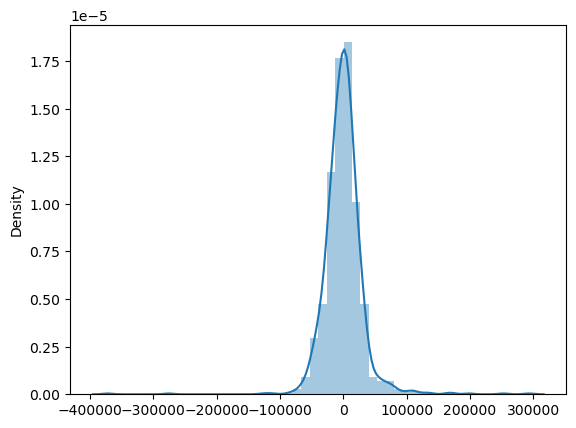

In [88]:
residual = y_train - y_train_pred
sns.distplot(residual)

In [121]:
#evalate R squard
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
r2

0.8333729023389834

# Prediction and evaluation on test data set

In [89]:
X_test_sm.head()

,const,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,LowQualFinSF,FullBath,HalfBath,KitchenAbvGr,KitchenQual,GarageCars,MSSubClass_120,MSSubClass_160,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,HouseStyle_1Story,HouseStyle_2Story,MasVnrType_None,GarageFinish_RFn,GarageFinish_Unf
1436,1.0,-1.511853,0.368043,-0.602626,-0.667685,-0.592717,0.751913,0.479129,-0.285628,-0.796982,-0.779463,-0.100589,-0.999476,-0.790313,-0.14944,-0.794633,0.350521,-0.240359,-0.224025,-0.187988,-0.101711,-0.187988,-0.277895,-0.167549,0.984703,-0.687838,0.810453,-0.693240,1.284087
57,1.0,0.645123,-0.505686,-0.602626,1.042526,-0.592717,-1.157293,-0.974462,-0.285628,0.644789,-0.790838,-0.100589,0.780079,1.132782,-0.14944,0.731899,0.350521,-0.240359,-0.224025,-0.187988,-0.101711,-0.187988,-0.277895,-0.167549,-1.012056,1.448851,0.810453,1.437561,-0.776096
780,1.0,0.645123,-0.505686,-0.377672,-0.667685,-0.592717,-1.157293,-0.974462,-0.285628,1.532939,0.326787,-0.100589,0.780079,-0.790313,-0.14944,-0.794633,0.350521,-0.240359,-0.224025,-0.187988,-0.101711,-0.187988,-0.277895,-0.167549,0.984703,-0.687838,-1.229653,-0.693240,-0.776096
382,1.0,0.645123,-0.505686,-0.602626,1.042526,1.341064,-1.157293,-0.974462,-0.285628,0.830900,-0.566175,-0.100589,0.780079,1.132782,-0.14944,0.731899,0.350521,-0.240359,-0.224025,-0.187988,-0.101711,-0.187988,-0.277895,-0.167549,-1.012056,1.448851,0.810453,1.437561,-0.776096
1170,1.0,-0.073869,0.368043,-0.602626,-0.667685,1.341064,0.751913,0.257315,-0.285628,-0.028980,-0.057130,-0.100589,-0.999476,-0.790313,-0.14944,-0.794633,-0.978727,-0.240359,-0.224025,-0.187988,-0.101711,-0.187988,-0.277895,-0.167549,-1.012056,-0.687838,0.810453,-0.693240,-0.776096


In [90]:
model10=sm.OLS(y_test,X_test_sm)
res10=model10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.65
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.89e-106
Time:                        12:07:58   Log-Likelihood:                -3397.0
No. Observations:                 292   AIC:                             6852.
Df Residuals:                     263   BIC:                             6959.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.821e+05   1683.179    108.198      0.000    1.79e+05    1.85e+05
OverallQual           1.654e+04   3470.384      4.766      0.000    9706.668    2.34e+04
OverallCond           4906.5951   2003.381      2.449      0.015     961.887    8851.303
MasVnrArea            4581.2172   2889.429      1.586      0.114   -1108.141    1.03e+04
ExterQual             5693.1789   2957.811      1.925      0.055    -130.826    1.15e+04
BsmtExposure          4924.9952   2083.398      2.364      0.019     822.733    9027.257
BsmtFinType1         -1861.3470   2586.413     -0.720      0.472   -6954.059    3231.365
BsmtFinSF1            9706.6430   4430.712      2.191      0.029     982.460    1.84e+04
BsmtFinSF2             963.7010   2036.387      0.473      0.636   -3045.995    4973.398
BsmtUnfSF             2007.1476   3908.261      0.514      0.608   -5688.317    9702.612
1stFlrSF              2.182e+04   3779.097      5.773      0.000    1.44e+04    2.93e+04
LowQualFinSF          5836.1029   1840.316      3.171      0.002    2212.475    9459.731
FullBath              8916.0969   2803.687      3.180      0.002    3395.567    1.44e+04
HalfBath              4511.4462   2516.090      1.793      0.074    -442.799    9465.691
KitchenAbvGr         -4951.2304   1821.536     -2.718      0.007   -8537.881   -1364.580
KitchenQual           6246.5492   2824.988      2.211      0.028     684.077    1.18e+04
GarageCars            9411.0261   2713.803      3.468      0.001    4067.481    1.48e+04
MSSubClass_120       -4758.6968   1892.503     -2.514      0.013   -8485.082   -1032.311
MSSubClass_160       -7295.6508   1921.320     -3.797      0.000   -1.11e+04   -3512.524
Neighborhood_Crawfor  4123.1964   1918.966      2.149      0.033     344.705    7901.688
Neighborhood_NoRidge  3713.6081   1883.072      1.972      0.050       5.792    7421.424
Neighborhood_NridgHt  1.057e+04   1974.774      5.355      0.000    6685.684    1.45e+04
Neighborhood_Somerst  2345.5574   2008.806      1.168      0.244   -1609.832    6300.946
Neighborhood_StoneBr  1.397e+04   1856.910      7.521      0.000    1.03e+04    1.76e+04
HouseStyle_1Story    -3854.6828   2789.470     -1.382      0.168   -9347.219    1637.853
HouseStyle_2Story     1.065e+04   3470.853      3.069      0.002    3818.767    1.75e+04
MasVnrType_None       3231.3433   2722.429      1.187      0.236   -2129.187    8591.874
GarageFinish_RFn       -74.4522   2141.993     -0.035      0.972   -4292.090    4143.186
GarageFinish_Unf      2190.3296   2387.059      0.918      0.360   -2509.849    6890.508
==============================================================================
Omnibus:                       42.270   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.88

In [91]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_test_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_test_sm.values,i) for i in range(len(X_test_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,OverallQual,4.236474
2,OverallCond,1.411812
3,MasVnrArea,2.936795
4,ExterQual,3.077446
5,BsmtExposure,1.526841
6,BsmtFinType1,2.353127
7,BsmtFinSF1,6.905524
8,BsmtFinSF2,1.458714
9,BsmtUnfSF,5.372999


0.8333729023389834

In [109]:
y_test_pred = res10.predict(X_test_sm)

In [120]:
#evalate R squard on test set
r2 = r2_score(y_true = y_test,y_pred = y_test_pred)
r2

0.8841044302604126

In [110]:
y_pred_train = y_train_pred
y_pred_test = y_test_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8333729023389834
0.8841044302604126
1221392452738.15
217570095972.86365
1045712716.3854023
745103068.400218


In [138]:
X_train_sm.columns

Index(['const', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'HouseStyle_1Story', 'MasVnrType_None', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

## Final model :

####  No of variables = 23
#### 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'HouseStyle_1Story', 'MasVnrType_None', 'GarageFinish_RFn', 'GarageFinish_Unf'

#### R-square on train set = 83%
#### R-square on test set = 88%


# Ridge regression

In [95]:
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_sm, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# Best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [97]:


#Fitting Ridge model for alpha = 10 and printing coefficients
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_sm, y_train)
print(ridge.coef_)

[    0.         16560.31264133  4159.6877451   6490.766718
  6823.34918096  7188.05013361  2910.73338842  6489.53176014
  2405.04357546  1975.82000637 14208.75140086   732.08153007
  8910.20088165  8199.88320346 -3776.93191801  7226.58900416
  9208.42923045 -5675.49506189 -7140.99927401  5217.2560967
  9843.77700583 10598.17208232  3996.66771658  5082.26527781
  -224.02442488  4195.65494766  4007.3593323  -5134.59057706
 -5306.39600637]


In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_sm)
y_pred_test = ridge.predict(X_test_sm)

metric2 = []
r2_train = r2_score(y_train, y_pred_train)
print('R squard train - ', r2_train)
metric2.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R squard test - ', r2_test)
metric2.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS train - ', rss_train)
metric2.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('RSS test - ', rss_test)
metric2.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE train - ', mse_train)
metric2.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE test - ',mse_test)
metric2.append(mse_test**0.5)

R squard train -  0.8320767971726789
R squard test -  0.8465450733064175
RSS train -  1230893026716.218
RSS test -  288080063830.3187
MSE train -  1053846769.4488168
MSE test -  986575561.0627353


# Lasso regression

In [99]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [101]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_sm, y_train) 

Lasso(alpha=100)

In [102]:
lasso.coef_

array([    0.        , 18391.3935649 ,  4543.87678011,  6725.35651703,
        5953.45075099,  7473.54318934,  2971.50973674,  4838.97184177,
        1866.16305283,   240.34578628, 16119.0110144 ,   709.18070766,
        9074.03599933,  8838.87544666, -4072.03007504,  6621.76650338,
        9047.44194577, -6305.19595248, -7616.77622291,  5368.92251648,
       10438.30866574, 11746.41792679,  4602.12243784,  5479.20139122,
         206.77265084,  4229.49584009,  5055.70586573, -5822.9162642 ,
       -5560.35359749])

In [103]:
y_pred_train = lasso.predict(X_train_sm)
y_pred_test = lasso.predict(X_test_sm)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8333121784361139
0.8473226774005266
1221837564713.9736
286620272073.2711
1046093805.4057994
981576274.2235312


# Table with all metrics

In [111]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.333729e-01,8.320768e-01,8.333122e-01
1,R2 Score (Test),8.841044e-01,8.465451e-01,8.473227e-01
2,RSS (Train),1.221392e+12,1.230893e+12,1.221838e+12
3,RSS (Test),2.175701e+11,2.880801e+11,2.866203e+11
4,MSE (Train),3.233748e+04,3.246301e+04,3.234337e+04
5,MSE (Test),2.729658e+04,3.140980e+04,3.133012e+04


# Table of all coefficients

In [112]:
betas = pd.DataFrame(index=X_train_sm.columns)

In [113]:
betas.rows = X_train_sm.columns

In [118]:
betas['Linear'] = res10.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [119]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso,Linear
const,0.000000,0.000000,182117.102740
OverallQual,16560.312641,18391.393565,16539.939878
OverallCond,4159.687745,4543.876780,4906.595075
MasVnrArea,6490.766718,6725.356517,4581.217221
ExterQual,6823.349181,5953.450751,5693.178853
BsmtExposure,7188.050134,7473.543189,4924.995195
BsmtFinType1,2910.733388,2971.509737,-1861.346980
BsmtFinSF1,6489.531760,4838.971842,9706.643045
BsmtFinSF2,2405.043575,1866.163053,963.701030
BsmtUnfSF,1975.820006,240.345786,2007.147622


# Question 1

In [123]:
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000, 10000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_sm, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
#Fitting Ridge model for alpha = 10 and printing coefficients
alpha = 10000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_sm, y_train)
print(ridge.coef_)

[    0.          4575.35203778  -297.84207421  2600.94723787
  3816.01371845  2189.03226793  1719.31647745  2313.77648657
   147.25833028  1148.14963395  3584.8867172   -257.39915196
  3059.59565806  1813.19379767  -849.54693775  3692.83036994
  3578.44070377   164.55114029  -884.72701384   648.45872955
  2239.85124249  2339.42869211   743.88332323  1004.05878228
  -328.66844331  1371.15479455 -1682.27566735   677.03253904
 -2316.45338162]


In [125]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_sm)
y_pred_test = ridge.predict(X_test_sm)

metric2 = []
r2_train = r2_score(y_train, y_pred_train)
print('R squard train - ', r2_train)
metric2.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R squard test - ', r2_test)
metric2.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS train - ', rss_train)
metric2.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('RSS test - ', rss_test)
metric2.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE train - ', mse_train)
metric2.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE test - ',mse_test)
metric2.append(mse_test**0.5)

R squard train -  0.47698714405544207
R squard test -  0.47268385173186955
RSS train -  3833733911847.1636
RSS test -  989927615391.4043
MSE train -  3282306431.375996
MSE test -  3390163066.408919


In [126]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =10000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_sm, y_train) 

Lasso(alpha=10000)

In [127]:
lasso.coef_

array([    0.        , 29399.45930273,     0.        ,  2370.23575218,
        5969.77597122,  1015.05868093,     0.        ,  2320.12158147,
           0.        ,    -0.        , 12122.57971295,    -0.        ,
        1842.25989026,  1384.14508996,    -0.        ,  6583.59552307,
        7340.30466188,    -0.        ,    -0.        ,     0.        ,
        3788.52148174,     0.        ,     0.        ,     0.        ,
          -0.        ,     0.        ,    -0.        ,    -0.        ,
          -0.        ])

In [128]:
y_pred_train = lasso.predict(X_train_sm)
y_pred_test = lasso.predict(X_test_sm)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7298848639589657
0.7549377481696005
1979969603755.7764
460053975918.75146
1695179455.2703564
1575527314.7902448


### If choose alpha value double for ridge and lasso then more feature removed from model and R-squard value also decreased.

In [129]:
X_train_sm.columns

Index(['const', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2Story', 'MasVnrType_None', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

# Question 3:

In [130]:
X_train_sm = X_train_sm.drop(['OverallQual','1stFlrSF', 'Neighborhood_StoneBr', 'HouseStyle_2Story', 'Neighborhood_NridgHt'], axis=1)

In [131]:
X_test_sm = X_test_sm.drop(['OverallQual','1stFlrSF', 'Neighborhood_StoneBr', 'HouseStyle_2Story', 'Neighborhood_NridgHt'], axis=1)

In [132]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 100}


In [134]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_sm, y_train) 

Lasso(alpha=100)

In [135]:
lasso.coef_

array([    0.        ,  4933.13937434, 10991.53725605, 13710.23970498,
        8185.15187983,     0.        , 21124.58742391,  7189.9289563 ,
       14722.99480923,   847.71949581, 14661.68385477,  9930.00182376,
       -4499.23277171, 12563.84318732, 14379.25042583, -3483.26531415,
       -7082.94864257,  6661.93182423,  9023.86766143,  1982.19140016,
        -949.11567165,  4898.64960834, -6071.50853087, -7395.20727118])

In [136]:
y_pred_train = lasso.predict(X_train_sm)
y_pred_test = lasso.predict(X_test_sm)


r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7846332597064201
0.7803193147828803


In [137]:
X_train_sm.columns

Index(['const', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'GarageCars', 'MSSubClass_120', 'MSSubClass_160', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'HouseStyle_1Story', 'MasVnrType_None', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

### After removing top five most important predictor nest top most important predictors are
### ExterQual, BsmtFinSF1, BsmtUnfSF, FullBath, GarageCars